# Imports

In [1]:
import numpy as np
import pandas as pd
import os
from PIL import Image
from matplotlib import pyplot as plt

import seaborn as sn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

from keras.layers.core import Flatten
from keras.layers.convolutional import *
from keras.layers.pooling import *

tf.data.experimental.enable_debug_mode()

# Encoding of classfication

In [2]:
Encode = {
    'buildings': 0,
    'forest': 1,
    'glacier': 2,
    'mountain': 3,
    'sea': 4,
    'street': 5
}

# Loading Data

In [3]:
def Data_Loading(base_path):
    XList, YList = [], []

    for directory in os.listdir(base_path):
        for imageName in os.listdir(base_path + '/' + directory):
            image = Image.open(base_path + '/' + directory + '/' + imageName)
            if image.size != (150,150):
                image = image.resize((150,150), Image.ANTIALIAS)

            XList.append(np.array(image))
            YList.append(Encode[directory])
        print(directory+"'s Image Loaded")

    X = np.rollaxis(np.dstack(XList),-1)
    Y = np.array(YList)
    return X,Y

In [4]:
X_train,Y_train = Data_Loading('/kaggle/input/intel-image-classification/seg_train/seg_train')

mountain's Image Loaded
street's Image Loaded
buildings's Image Loaded
sea's Image Loaded
forest's Image Loaded
glacier's Image Loaded


In [5]:
X_test,Y_test = Data_Loading('/kaggle/input/intel-image-classification/seg_test/seg_test')

mountain's Image Loaded
street's Image Loaded
buildings's Image Loaded
sea's Image Loaded
forest's Image Loaded
glacier's Image Loaded


In [6]:
X_train = X_train.reshape(-1, 150, 150, 3)
X_train.shape

(14034, 150, 150, 3)

In [7]:
X_test = X_test.reshape(-1, 150, 150, 3)
X_test.shape

(3000, 150, 150, 3)

In [8]:
Y_train.shape

(14034,)

In [9]:
Y_test.shape

(3000,)

# Convolutional Model

In [10]:
model = Sequential(
    [
        Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(150,150,3), kernel_regularizer = regularizers.l2(0.1)),
        Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer = regularizers.l2(0.01)),
        MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"),
        
        Conv2D(filters=256, kernel_size=(5, 5), padding="same", activation="relu", kernel_regularizer = regularizers.l2(0.1)),
        Conv2D(filters=512, kernel_size=(5, 5), padding="same", activation="relu", kernel_regularizer = regularizers.l2(0.01)),
        MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"),
        
        Flatten(),
        
        Dense(units=6, activation='softmax')
    ]
)
model.summary()

2022-02-06 06:33:11.715859: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 128)     3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 128)     147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 256)       819456    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 512)       3277312   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 512)       0         
_________________________________________________________________
flatten (Flatten)            (None, 700928)            0

2022-02-06 06:33:11.828545: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-06 06:33:11.829233: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-06 06:33:11.830458: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-06 06:33:11.831681: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x=X_train, y=Y_train, batch_size=64, validation_data=(X_test,Y_test),epochs=20, shuffle=True, verbose=1)

2022-02-06 06:33:13.995817: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 947295000 exceeds 10% of free system memory.
2022-02-06 06:33:14.970144: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 947295000 exceeds 10% of free system memory.
2022-02-06 06:33:15.670968: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-02-06 06:33:17.064137: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


220/220 [==============================] - 91s 366ms/step - loss: 22.5003 - accuracy: 0.5411 - val_loss: 13.9931 - val_accuracy: 0.6473
Epoch 2/20
220/220 [==============================] - 74s 336ms/step - loss: 12.1746 - accuracy: 0.7072 - val_loss: 10.8608 - val_accuracy: 0.6937
Epoch 3/20
220/220 [==============================] - 74s 336ms/step - loss: 9.7915 - accuracy: 0.7757 - val_loss: 9.1017 - val_accuracy: 0.7540
Epoch 4/20
220/220 [==============================] - 74s 336ms/step - loss: 8.3208 - accuracy: 0.8157 - val_loss: 7.9015 - val_accuracy: 0.7713
Epoch 5/20
220/220 [==============================] - 74s 336ms/step - loss: 7.2265 - accuracy: 0.8520 - val_loss: 7.0249 - val_accuracy: 0.7750
Epoch 6/20
220/220 [==============================] - 74s 336ms/step - loss: 6.3524 - accuracy: 0.8801 - val_loss: 6.4141 - val_accuracy: 0.7540
Epoch 7/20
220/220 [==============================] - 74s 336ms/step - loss: 5.6606 - accuracy: 0.8951 - val_loss: 5.8787 - val_accuracy:

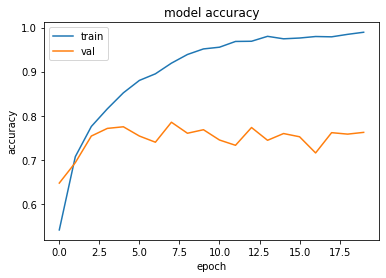

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

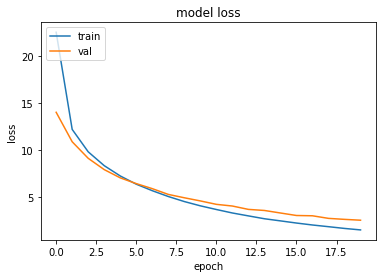

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
Y_pred = model.predict(X_test)
Y_pred = Y_pred.argmax(axis=1)
matrix = confusion_matrix(Y_test, Y_pred, labels=[0, 1, 2, 3, 4, 5])

<AxesSubplot:>

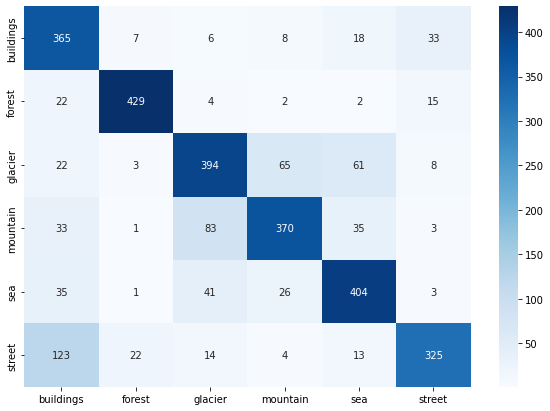

In [16]:
df_cm = pd.DataFrame(matrix, index = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'], columns = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')